In [21]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import random
import math

In [2]:
def read_transients(filename):

    data = loadmat(filename)

    transients = data['out_transients']

    t = transients[0][0][0].flatten()
    ppm = transients[0][0][1].flatten()
    fid1 = transients[0][0][2]
    fid2 = transients[0][0][3]

    return {
        "t":t,
        "ppm":ppm,
        "fid1":fid1,
        "fid2":fid2
    }


In [14]:
sites = [5,7,8]
scans=list(range(1,13))

In [29]:
### no freq or phase offset
fids = []
for st in sites:
    for sc in scans:
        fid_obj = read_transients("in_vivo_raw/ge_{:02d}_{:02d}.mat".format(st,sc))
        on = fid_obj["fid1"].reshape(1,2048,1,160)
        off = fid_obj["fid2"].reshape(1,2048,1,160)
        fid = np.concatenate([off,on],axis=2)
        fids.append(fid)
final_fids = np.concatenate(fids,axis=0)

np.save("in_vivo_datasets/in_vivo_0.npy",final_fids)

In [30]:
### small offsets
## freq < 5Hz
## phase < 20Hz
min_freq=0
max_freq=5
min_phase=0
max_phase=20
fids = []
for st in sites:
    for sc in scans:
        fid_obj = read_transients("in_vivo_raw/ge_{:02d}_{:02d}.mat".format(st,sc))

        on = fid_obj["fid1"].reshape(1,2048,1,160)
        off = fid_obj["fid2"].reshape(1,2048,1,160)
        t = fid_obj["t"]


        on_freq_shift = np.random.uniform(min_freq,max_freq,size=(1,1,1,160))*np.random.choice([-1,1],size=(1,1,1,160),replace=True)
        on_phase_shift = np.random.uniform(min_phase,max_phase,size=(1,1,1,160))*np.random.choice([-1,1],size=(1,1,1,160),replace=True)
        on = on*np.exp(1j*(on_freq_shift*t.reshape(1,2048,1,1)*2*math.pi + on_phase_shift*math.pi/180))

        off_freq_shift = np.random.uniform(min_freq,max_freq,size=(1,1,1,160))*np.random.choice([-1,1],size=(1,1,1,160),replace=True)
        off_phase_shift = np.random.uniform(min_phase,max_phase,size=(1,1,1,160))*np.random.choice([-1,1],size=(1,1,1,160),replace=True)
        off = off*np.exp(1j*(off_freq_shift*t.reshape(1,2048,1,1)*2*math.pi + off_phase_shift*math.pi/180))

        fid = np.concatenate([off,on],axis=2)
        fids.append(fid)
final_fids = np.concatenate(fids,axis=0)

np.save("in_vivo_datasets/in_vivo_1.npy",final_fids)

In [31]:
### medium offsets
## 5 < freq < 10Hz
## 20 < phase < 40Hz
min_freq=5
max_freq=10
min_phase=20
max_phase=40
fids = []
for st in sites:
    for sc in scans:
        fid_obj = read_transients("in_vivo_raw/ge_{:02d}_{:02d}.mat".format(st,sc))

        on = fid_obj["fid1"].reshape(1,2048,1,160)
        off = fid_obj["fid2"].reshape(1,2048,1,160)
        t = fid_obj["t"]


        on_freq_shift = np.random.uniform(min_freq,max_freq,size=(1,1,1,160))*np.random.choice([-1,1],size=(1,1,1,160),replace=True)
        on_phase_shift = np.random.uniform(min_phase,max_phase,size=(1,1,1,160))*np.random.choice([-1,1],size=(1,1,1,160),replace=True)
        on = on*np.exp(1j*(on_freq_shift*t.reshape(1,2048,1,1)*2*math.pi + on_phase_shift*math.pi/180))

        off_freq_shift = np.random.uniform(min_freq,max_freq,size=(1,1,1,160))*np.random.choice([-1,1],size=(1,1,1,160),replace=True)
        off_phase_shift = np.random.uniform(min_phase,max_phase,size=(1,1,1,160))*np.random.choice([-1,1],size=(1,1,1,160),replace=True)
        off = off*np.exp(1j*(off_freq_shift*t.reshape(1,2048,1,1)*2*math.pi + off_phase_shift*math.pi/180))

        fid = np.concatenate([off,on],axis=2)
        fids.append(fid)
final_fids = np.concatenate(fids,axis=0)

np.save("in_vivo_datasets/in_vivo_2.npy",final_fids)

In [32]:
### large offsets
## 10 < freq < 20Hz
## 45 < phase < 90Hz
min_freq=10
max_freq=20
min_phase=45
max_phase=90
fids = []
for st in sites:
    for sc in scans:
        fid_obj = read_transients("in_vivo_raw/ge_{:02d}_{:02d}.mat".format(st,sc))

        on = fid_obj["fid1"].reshape(1,2048,1,160)
        off = fid_obj["fid2"].reshape(1,2048,1,160)
        t = fid_obj["t"]


        on_freq_shift = np.random.uniform(min_freq,max_freq,size=(1,1,1,160))*np.random.choice([-1,1],size=(1,1,1,160),replace=True)
        on_phase_shift = np.random.uniform(min_phase,max_phase,size=(1,1,1,160))*np.random.choice([-1,1],size=(1,1,1,160),replace=True)
        on = on*np.exp(1j*(on_freq_shift*t.reshape(1,2048,1,1)*2*math.pi + on_phase_shift*math.pi/180))

        off_freq_shift = np.random.uniform(min_freq,max_freq,size=(1,1,1,160))*np.random.choice([-1,1],size=(1,1,1,160),replace=True)
        off_phase_shift = np.random.uniform(min_phase,max_phase,size=(1,1,1,160))*np.random.choice([-1,1],size=(1,1,1,160),replace=True)
        off = off*np.exp(1j*(off_freq_shift*t.reshape(1,2048,1,1)*2*math.pi + off_phase_shift*math.pi/180))

        fid = np.concatenate([off,on],axis=2)
        fids.append(fid)
final_fids = np.concatenate(fids,axis=0)

np.save("in_vivo_datasets/in_vivo_3.npy",final_fids)

In [26]:
# save t and ppm
fid_obj = read_transients("in_vivo_raw/ge_05_01.mat")
t = fid_obj["t"]
ppm = fid_obj["ppm"]
np.save("in_vivo_datasets/t.npy",t)
np.save("in_vivo_datasets/ppm.npy",ppm)

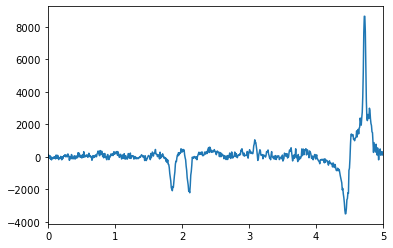

In [40]:
###sanity check

scan = 3
dataset = 3

ppm = np.load("in_vivo_datasets/ppm.npy")
test_fids = np.load(f"in_vivo_datasets/in_vivo_{dataset}.npy")
test_specs = np.fft.fftshift(np.fft.ifft(test_fids,axis=1),axes=1)

on = test_specs[scan,:,1,:].mean(axis=1)
off = test_specs[scan,:,0,:].mean(axis=1)

plt.plot(ppm,np.real(on-off))
plt.xlim(0,5)
plt.show()
